Please, introduce a data file:

data.csv
Theta file found, using theta = [8499.599649932163, -0.021448963591692384]


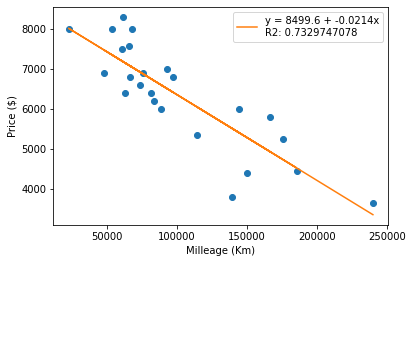

In [53]:
#! /usr/bin/env python3

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

class colors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

def simple_gradient(x, y, theta):
    if type(theta) != np.ndarray or type(x) != np.ndarray or x.ndim != 1\
            or theta.ndim != 1 or len(theta) != 2 or type(y) != np.ndarray\
            or y.ndim != 1 or len(y) != len(x):
        return None
    else:
        X = np.concatenate(((np.ones((len(x), 1))), x.reshape(len(x), 1)),
                           axis=1)
        h0 = X @ theta
        J = ((h0 - y) @ X)/len(x)
        return((J))

def fit(x, y, theta, alpha=0.005, max_iter=150000):
    if type(theta) != np.ndarray or type(x) != np.ndarray or x.ndim != 1\
            or theta.ndim != 1 or len(theta) != 2 or type(y) != np.ndarray\
            or y.ndim != 1 or len(y) != len(x) or type(alpha) != float or\
        type(max_iter) != int or max_iter < 0 :
        return None
    else:
        new_theta = np.array([float(theta[0]), float(theta[1])])
        for i in range(max_iter):
            J = simple_gradient(x, y, new_theta)
            new_theta[0] = new_theta[0] - alpha * J[0]
            new_theta[1] = new_theta[1] - alpha * J[1]
        return(new_theta)

def normalizer(data):
    if type(data) != np.ndarray or data.ndim != 1:
        return None
    else:
        data_max = np.max(data)
        data_min = np.min(data)
        norm_data = (data - data_min) / (data_max - data_min)
        return (np.array(norm_data))

def plot_data(x, y, theta, r2_score):
    label = f"y = {round(theta[0], 2)} + {round(theta[1], 4)}x" +\
        f"\nR2: {round(r2_score, 10)}"
    fig, ax = plt.subplots()
    ax.plot(x, y, 'o')
    ax.plot(x, theta[1] * x + theta[0], label = label)
    ax.set_xlabel('Milleage (Km)')
    ax.set_ylabel('Price ($)')
    plt.legend(loc='upper right')
    plt.annotate("r-squared = {:.3f}".format(r2_score), (0, 1))
    plt.show()

def save_theta(theta, file):
    file.seek(0)
    file.write(f"Theta training data:\nT0 = {theta[0]}\nT1 = {theta[1]}")
    file.close

def r2score(y, y_hat):
    if type(y_hat) != np.ndarray or type(y) != np.ndarray or y.ndim != 1\
            or y_hat.ndim != 1 or len(y_hat) != len(y):
        return None
    else:
        return 1.0 - (np.sum((y_hat - y) ** 2) / np.sum((y - np.mean(y)) ** 2))

def get_theta():
    theta = []
    try:
        theta_file = open('theta.txt', 'r')
        lines = theta_file.readlines()
        for i in range(1, 3):
            words = lines[i].split()
            theta.append(float(words[2]))
        print(f"{colors.OKBLUE}Theta file found, using theta"
         + f" = {theta}{colors.ENDC}")
        theta_file.close
    except:
        print("No theta file, using theta = [0.0, 0.0]")
        theta = [0.0, 0.0]
    return(theta)

def train_model():
    filename = input(f"{colors.OKBLUE}Please, introduce a data file:\n" +\
        colors.ENDC)
    if not filename:
        filename = 'data.csv'
        print("data.csv")
    try:
        file = pd.read_csv(filename)
        data = np.asarray(file).transpose()
        x = data[0]
        y = data[1]
    except:
        print(colors.WARNING + "Invalid data file")
        return
    theta = get_theta()
    theta_file = open('theta.txt', 'w+')
    new_theta = fit(normalizer(x), normalizer(y), np.array(theta))
    new_theta[0] = new_theta[0]*(max(y)-min(y)) + min(y) + \
            (new_theta[1]*min(x)*(min(y)-max(y)))/(max(x)-min(x))
    new_theta[1] = new_theta[1]*(max(y)-min(y)) / (max(x)-min(x))
    r2_score = r2score(y, np.concatenate(((np.ones((len(x), 1))),
            x.reshape(len(x), 1)), axis=1) @ new_theta )
    plot_data(x, y, new_theta, r2_score)
    save_theta(new_theta, theta_file)


if __name__ == "__main__":
   train_model()